# Kernel-Visualization.
This notebook visualizes the suggested kernels for real-time fluid simulation from the paper "Particle-Based Fluid Simulation for Interactive Applications" by Matthias Müller, David Charypar and Markus Gross.
https://dl.acm.org/doi/10.5555/846276.846298

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

## Kernel functions.

In [3]:
def w_poly6(r, h):
  r = abs(r)
  if r > h:
    return 0
  else:
    return \
      (315 / (64 * math.pi * h**9)) * \
      (h**2 - r**2)**3
      
def w_poly6_der1(r, h):
  r = abs(r)
  if r > h:
    return 0
  else:
    return \
      (315 / (64 * math.pi * h**9)) * \
      (2 * r) * \
      3 * (h**2 - r**2)**2
      

In [4]:
def w_spiky(r, h):
  r = abs(r)
  if r > h:
    return 0
  else:
    return \
      (15 / (math.pi * h**6)) * \
      (h - r)**3

In [5]:
def w_viscosity(r, h):
  r = abs(r)
  if r > h:
    return 0
  else:
    return \
      (15 / (2 * math.pi * h**3)) * \
      ( -(r**3) / (2 * h**3) + \
         (r**2) / (h**2) + \
         (h) / (2 * r) - 1)

## Visualization.

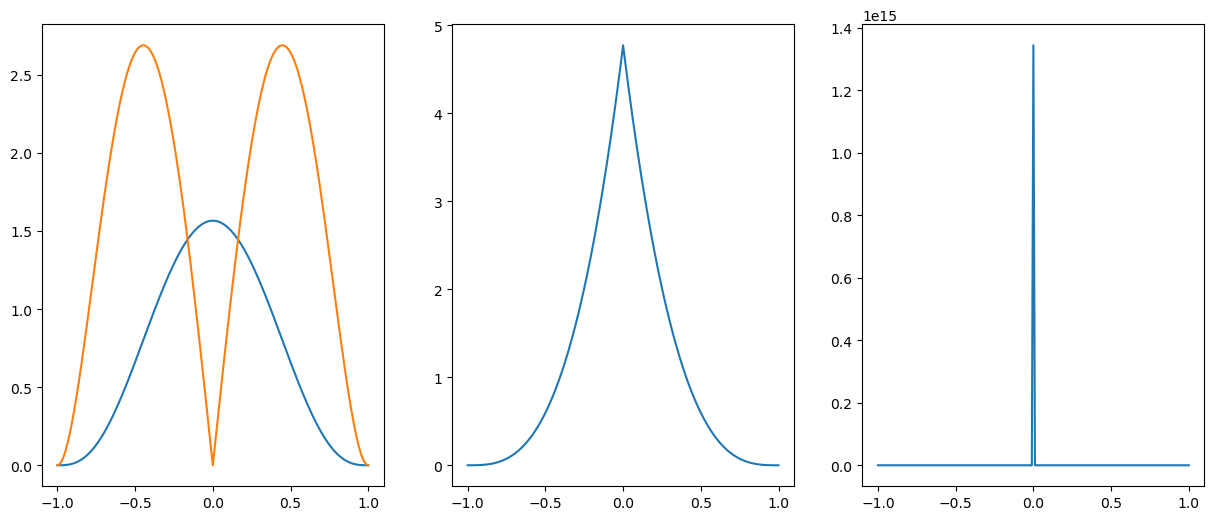

In [6]:
h = 1
r_step = 0.01
x = np.arange(-h, h + r_step, r_step)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
# w_poly6
ax1.plot(x, [w_poly6(_x, h) for _x in x])
ax1.plot(x, [w_poly6_der1(_x, h) for _x in x])
# w_spiky
ax2.plot(x, [w_spiky(_x, h) for _x in x])
# w_viscosity
ax3.plot(x, [w_viscosity(_x, h) for _x in x])

## Export.